# Seal Detection Model

## Load Model

In [1]:
%matplotlib inline

import torch
import os

from tools.image import cv
from checkpoint import load_model

from evaluate import evaluate_image
from detection import display, detection_table

from matplotlib import pyplot as plt
import random

/home/fdi19/miniconda3/envs/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

model, encoder, args = load_model("./log/Seals/model.pth")
device = torch.cuda.current_device()
model.to(device)
encoder.to(device)

classes = args.dataset.classes

def show(input, threshold=0.5):

    frame = cv.imread_color(input)

    nms_params = detection_table.nms_defaults._extend(nms = threshold)
    # pprint_struct(nms_params)

    results = evaluate_image(model, frame, encoder, nms_params = nms_params, device=device)

    d, p = results.detections, results.prediction
    detections = list(zip(d.index, d.label, d.bbox, d.confidence))
    predictions = list(zip(p[0], p[1]))

    for index, label, bbox, confidence in detections:
        if confidence > threshold:
            label_class = classes[label]
            display.draw_box(frame, bbox, confidence=confidence, scale=1.5,
                name=label_class.name, color=display.to_rgb(label_class.colour))

    h, w = frame.shape[:2]
    scale = 7

    plt.figure(figsize = (w/h*scale, scale))
    plt.imshow(frame, interpolation='nearest')
    plt.show()

# Demonstration

## Scott Base

### 2019-20

Camera: CameraC
Image: G2058.jpg


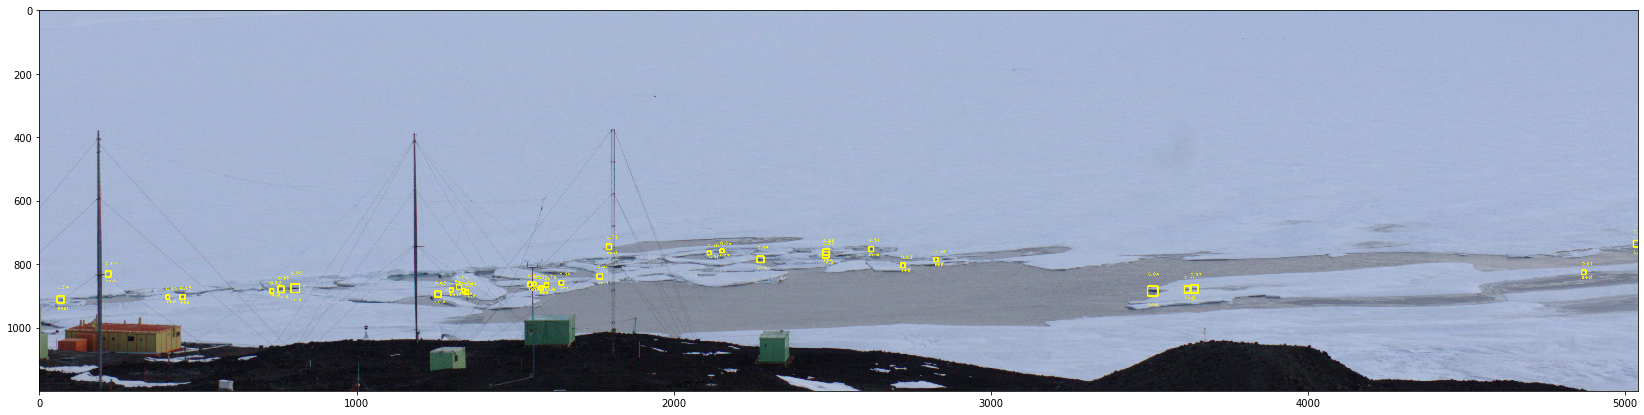

In [11]:
scott_base_2019 = "/home/fdi19/new_SENG402/data/images/scott_base/2019-20/"
camera = random.choice(os.listdir(scott_base_2019))
image = random.choice(os.listdir(scott_base_2019 + camera))
path = os.path.join(scott_base_2019, camera, image)
print(f'Camera: {camera}\nImage: {image}')
show(path)

### 2021-22

Image: 2022-01-20T07_48_44.jpg


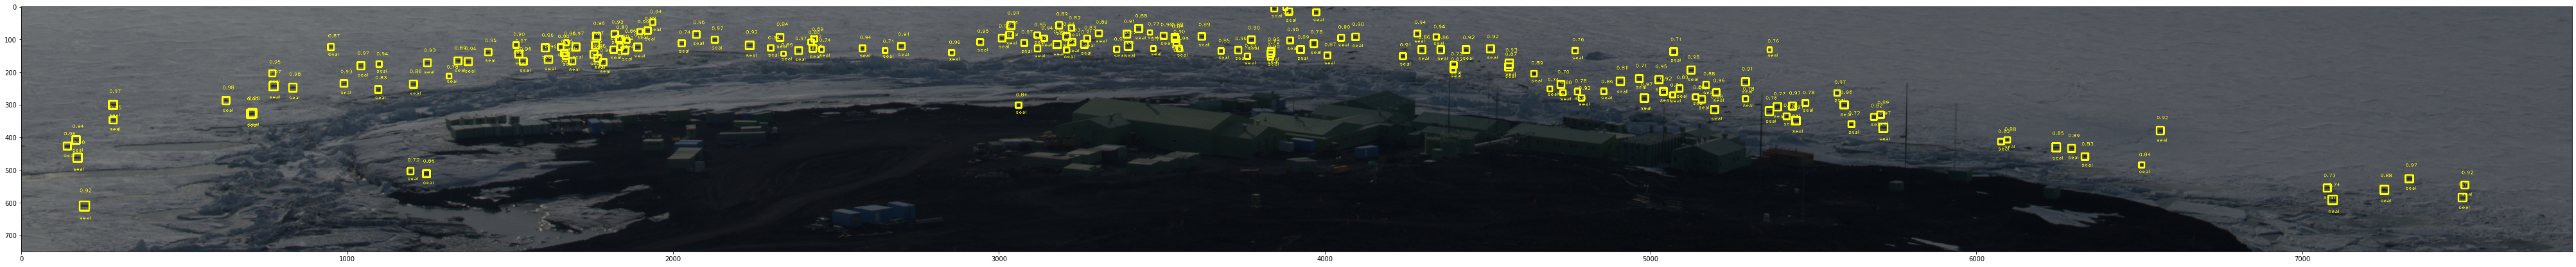

In [13]:
scott_base_2021 = "/home/fdi19/new_SENG402/data/images/scott_base/2021-22/"
image = random.choice(os.listdir(scott_base_2021))
path = os.path.join(scott_base_2021, image)
print(f'Image: {image}')
show(path, threshold=0.7)